## Dataset Information 
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data


### Columns:
• Country: Country name

• Year: Year of data collection

• Status: Developed/Developing status

• Life Expectancy: Life expectancy in age

• Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

• Infant Deaths: Number of Infant Deaths per 1000 population

• Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

• Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)

• Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

• Measles: Measles - number of reported cases per 1000 population

• BMI: Average Body Mass Index of entire population

• Under-five Deaths: Number of under-five deaths per 1000 population

• Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)

• Total Expenditure: General government expenditure on health as a percentage of total government expenditure (%)

• Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

• HIV/AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)

• GDP: Gross Domestic Product per capita (in USD)

• Population: Population of the country

• Thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

• Thinness 5-6 years: Prevalance of thinness among children for Age 5 to 9(%)

• Income Composition of Resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

• Schooling: Number of years of Schooling(years)

## Processing the Dataset
You are free to edit this to process the data differently, or to perform exploratory data analysis (EDA) before constructing your models.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import logging


df = pd.read_csv("Life Expectancy Data.csv")
print(df.info())
print(df.describe())

# # Convert 'Year' to datetime (optional) for better time-series handling
# df["Year"] = pd.to_datetime(df["Year"], format="%Y", errors="coerce")

# Drop columns with more than 30% missing values
threshold = 0.3
missing_percentage = df.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=columns_to_drop)

# Convert 'Status' to a binary representation
df["Status"] = df["Status"].map({"Developed": 1, "Developing": 0})

# Fill missing values for numerical columns with the column mean
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill missing values for categorical columns with mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop irrelevant columns if any (e.g., 'Country', if you want to focus on global patterns)
df = df.drop(columns=["Country"])  # Uncomment if 'Country' column shouldn't be dropped

# Drop duplicates
df = df.drop_duplicates()

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# # Ensure 'Year' is removed from the features as it is datetime
df = df.drop(columns=["Year"])

# Split data into features and target
X = df.drop(columns=["Life expectancy "])
y = df["Life expectancy "]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

/tmp/ipykernel_19482/530970970.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Implementing the Regression Models
Take a look at the sample linear regression function, and implement the other function in the same manner. 

#### Sample Linear Regression

In [27]:
def sample_linear_regression(X_train, y_train, X_test, y_test, n_iterations=100):
    mse_scores = []
    r2_scores = []

    for _ in range(n_iterations):
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)

    # Average the scores over all iterations
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    return avg_mse, avg_r2

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def linear_regression(X_train, y_train, X_test, y_test, n_iterations=100):
    mse_scores = []
    r2_scores = []

    for _ in range(n_iterations):
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(r2)

    # Average the scores over all iterations
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    return avg_mse, avg_r2


# linear_regression(X_train, y_train, X_test, y_test, n_iterations=100)

In [49]:
# Lasso Regression
def lasso_regression(X_train, y_train, X_test, y_test, alpha=1.0, n_iterations=100):
    mses = []
    r2s = []
    for _ in range(n_iterations):
        model = Lasso(alpha=alpha)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_test, y_pred))
        r2s.append(r2_score(y_test, y_pred))

    return np.mean(mses), np.mean(r2s)


# lasso_regression(X_train, y_train, X_test, y_test, alpha=1.0, n_iterations=100)

In [50]:
# Ridge Regression
def ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0, n_iterations=100):
    mses = []
    r2s = []
    for _ in range(n_iterations):
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_test, y_pred))
        r2s.append(r2_score(y_test, y_pred))

    return np.mean(mses), np.mean(r2s)


# ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0, n_iterations=100)

In [51]:
# Elastic Net Regression
def elastic_net_regression(
    X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5, n_iterations=100
):
    mses = []
    r2s = []
    for _ in range(n_iterations):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_test, y_pred))
        r2s.append(r2_score(y_test, y_pred))

    return np.mean(mses), np.mean(r2s)


# elastic_net_regression(
#     X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5, n_iterations=100
# )

## Evaluation

In [52]:
import warnings

warnings.filterwarnings(action="ignore")

# Train models and collect results
results = {}
results["Linear Regression"] = linear_regression(
    X_train, y_train, X_test, y_test, n_iterations=100
)
results["Lasso Regression"] = lasso_regression(
    X_train, y_train, X_test, y_test, alpha=1.0, n_iterations=100
)
results["Ridge Regression"] = ridge_regression(
    X_train, y_train, X_test, y_test, alpha=1.0, n_iterations=100
)
results["Elastic Net Regression"] = elastic_net_regression(
    X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5, n_iterations=100
)

# Print results
for k, v in results.items():
    print(f"{k} - Mean Squared Error: {v[0]:.2f}, R^2 Score: {v[1]:.2f}")

Linear Regression - Mean Squared Error: 16.13, R^2 Score: 0.82
Lasso Regression - Mean Squared Error: 18.01, R^2 Score: 0.80
Ridge Regression - Mean Squared Error: 16.14, R^2 Score: 0.82
Elastic Net Regression - Mean Squared Error: 17.70, R^2 Score: 0.80


## Inferences
To answer these questions, you are expected to continue experimentation. You may plot graphs, etc. to arrive at conclusions. All questions are to be backed up with proper reasoning.

(Answer the questions in the same markdown cells)

##### **1. How does the performance of the Linear Regression model compare with other regression models (Lasso, Ridge, Elastic Net) based on Mean Squared Error (MSE) and R^2 Score?**

Linear Regressions and Ridge Regression perform the best and Lasso and Elastic Net are slightly worse. 

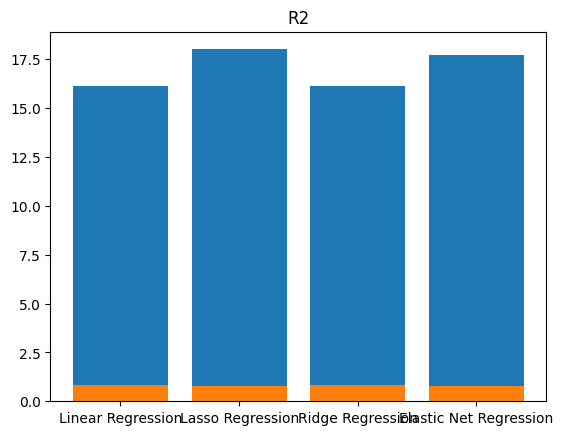

In [ ]:
import matplotlib.pyplot as plt

keys = list(results.keys())
mse = list(map(lambda x: x[0], results.values()))
r2 = list(map(lambda x: x[1], results.values()))

plt.bar(keys, mse)
plt.title("MSE")
plt.bar(keys, r2)
plt.title("R2")
plt.show()

##### **2. Which features are selected by Lasso Regression, and how does this compare with the features used in Linear Regression?**

Linear regression selects all features while lasso regression selects 

`Adult Mortality`, `infant deaths`, `Alcohol`, `percentage expenditure`, `Hepatitis B`, `Measles`, `BMI`, `under-five deaths`, `Polio`, `Diphtheria`, `HIV/AIDS`, `GDP`, `Population`, ` thinness  1-19 years`, `Schooling`


In [ ]:
def lasso_regression1(X_train, y_train, alpha=1.0):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    features = np.where(model.coef_ != 0)[0]
    return [X.columns[i] for i in features]


def linear_regression1(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    features = np.where(model.coef_ != 0)[0]
    return [X.columns[i] for i in features]


print(lasso_regression1(X_train, y_train, alpha=1.0))
print(linear_regression1(X_train, y_train))

['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 'Schooling']
['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


#### **3. How does Ridge Regression with different alpha values impact the model's performance and feature coefficients?**

MSE increases with increase in alpha and R2 reduces with increase in alpha. 

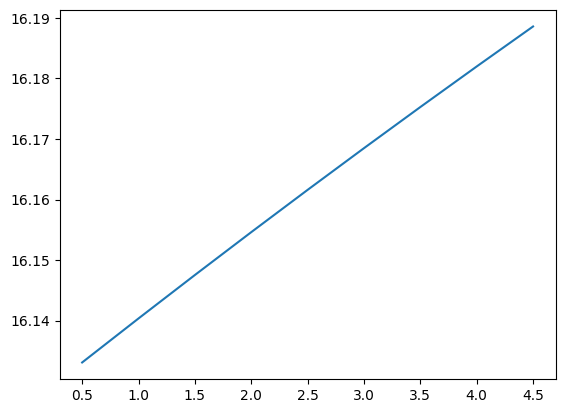

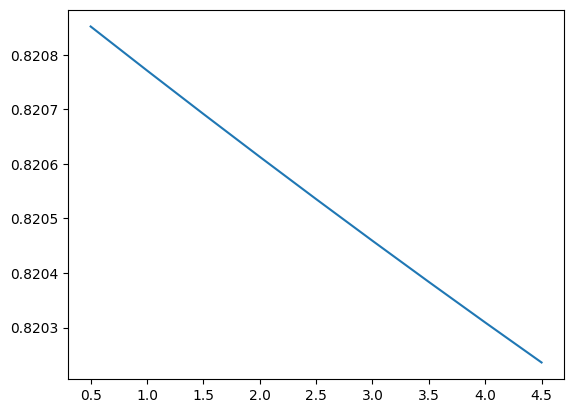

([np.float64(16.133083295986705),
  np.float64(16.140355124532956),
  np.float64(16.147531226576707),
  np.float64(16.15461161615486),
  np.float64(16.161596518802938),
  np.float64(16.168486343243483),
  np.float64(16.175281656432972),
  np.float64(16.18198316156002),
  np.float64(16.188591678639533)],
 [0.8208522452428876,
  0.8207714961552434,
  0.8206918100502714,
  0.8206131867721007,
  0.8205356238163009,
  0.8204591166442651,
  0.8203836589602976,
  0.8203092429559309,
  0.8202358595254143])

In [ ]:
import matplotlib.pyplot as plt


def ridge_regression1(X_train, y_train, X_test, y_test):
    mses = []
    r2s = []
    alphas = [i / 2 for i in range(1, 10)]
    for i in alphas:
        model = Ridge(alpha=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_test, y_pred))
        r2s.append(r2_score(y_test, y_pred))

    plt.figure()
    plt.plot(alphas, mses)
    plt.show()
    plt.figure()
    plt.plot(alphas, r2s)
    plt.show()
    return mses, r2s


ridge_regression1(X_train, y_train, X_test, y_test)

#### 4. How does Elastic Net's combination of Lasso and Ridge Regression affect feature selection and model performance?

Elastic Nets selects `Adult Mortality`, `infant deaths`, `Alcohol`, `percentage expenditure`, `Hepatitis B`, `Measles `, ` BMI `, `under-five deaths `, `Polio`, `Diphtheria `, ` HIV/AIDS`, `GDP`, `Population`, ` thinness  1-19 years`, ` thinness 5-9 years`, `Schooling`

In [57]:
def elastic_net_regression1(X_train, y_train, alpha=1.0, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    features = np.where(model.coef_ != 0)[0]
    return [X.columns[i] for i in features]


print(elastic_net_regression1(X_train, y_train, 1.0, 0.5))

['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Schooling']
